In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chf-readmission-data/3.1 Temporary data for analysis.xlsx


In [2]:
# major imports
import seaborn as sns
import matplotlib.pyplot as plt

# Patients With CHF 30-Day Readmission Prediction 

## EDA

In [3]:
# loading the excel file
df_raw_data = pd.read_excel("/kaggle/input/chf-readmission-data/3.1 Temporary data for analysis.xlsx")

In [4]:
df_raw_data.columns

Index(['file', 'patient_id', 'encounter_id', 'CHF', 'deceased', 'dob',
       'Date of Birth', 'Age', 'gender', 'race', 'ethnicity', 'start_time',
       'end_time', 'LOS', 'Readmission', 'discharge', 'I501', 'I502', 'I503',
       'I504', 'I509', 'E11', 'N18', 'J44', 'I10', 'I48', 'D50', 'E86',
       '2160-0', '3094-0', '2885-2', '2947-0', '2823-3', '2075-0', '1751-7',
       '6768-6', '1920-8', '1742-6', '718-7', '789-8', '30522-7', '14804-9',
       'echocardiogram', 'stress_testing', 'electrocardiogram', 'pacemaker',
       'catheterization', 'Z63', 'Z59', 'Z911', 'diuretics', 'ace_inhibitors',
       'arbs', 'beta_blockers', 'aldosterone', 'arni', 'glycosides',
       'vasodilators', 'anticoagulants', 'antiarrhythmic', 'others'],
      dtype='object')

### Data cleaning and filtering

In [5]:
# dropping unnecessary columns
columns_to_drop = ["encounter_id", "file", "patient_id", "deceased", "start_time", "end_time", 'dob', 'Date of Birth', "others"]
df_raw_data.drop(columns=columns_to_drop, inplace=True)

In [6]:
df_raw_data.columns #

Index(['CHF', 'Age', 'gender', 'race', 'ethnicity', 'LOS', 'Readmission',
       'discharge', 'I501', 'I502', 'I503', 'I504', 'I509', 'E11', 'N18',
       'J44', 'I10', 'I48', 'D50', 'E86', '2160-0', '3094-0', '2885-2',
       '2947-0', '2823-3', '2075-0', '1751-7', '6768-6', '1920-8', '1742-6',
       '718-7', '789-8', '30522-7', '14804-9', 'echocardiogram',
       'stress_testing', 'electrocardiogram', 'pacemaker', 'catheterization',
       'Z63', 'Z59', 'Z911', 'diuretics', 'ace_inhibitors', 'arbs',
       'beta_blockers', 'aldosterone', 'arni', 'glycosides', 'vasodilators',
       'anticoagulants', 'antiarrhythmic'],
      dtype='object')

In [7]:
# dropping non CHF records
df_data = df_raw_data.loc[df_raw_data["CHF"] != 0]
df_data.shape

(26641, 52)

#### Utility Functions

In [8]:
# Basic utility functions to help viualization
def plot_missing_vals(data: pd.DataFrame) -> None:
    '''for plotting missing values'''
    plt.figure(figsize = (30,10))
    plt.subplot(1,2,1)
    sns.heatmap(data.isnull(), cbar = True, vmin=0, vmax=1)
    plt.title("Missing Values Plot")
    plt.show()

def plot_heatmap(corr_matrix) -> None:
    plt.subplot(figsize=(30, 30))
    sns.heatmap(corr_matrix, square = True)

def save_df_as_excel(df,file_name) -> None:
    # saving dataframe
    path = f"/kaggle/working/{file_name}.xlsx"
    df_data.to_excel(path, index=False)

def plot_frequency_graph(df, feature) -> None:
    frequencies = df[feature].value_counts().sort_index()
    print("Value Frequencies for", feature)
    print(frequencies)

In [9]:
# Temporary cell for testing
# save_df_as_excel(df_data, "chf-data-race_ethnicity")

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26641 entries, 8 to 62189
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CHF                26641 non-null  int64  
 1   Age                26641 non-null  int64  
 2   gender             26641 non-null  object 
 3   race               26199 non-null  object 
 4   ethnicity          25923 non-null  object 
 5   LOS                26641 non-null  int64  
 6   Readmission        26641 non-null  int64  
 7   discharge          25335 non-null  float64
 8   I501               26641 non-null  int64  
 9   I502               26641 non-null  int64  
 10  I503               26641 non-null  int64  
 11  I504               26641 non-null  int64  
 12  I509               26641 non-null  int64  
 13  E11                26641 non-null  int64  
 14  N18                26641 non-null  int64  
 15  J44                26641 non-null  int64  
 16  I10                26641 no

#### Handling Null Values in DF

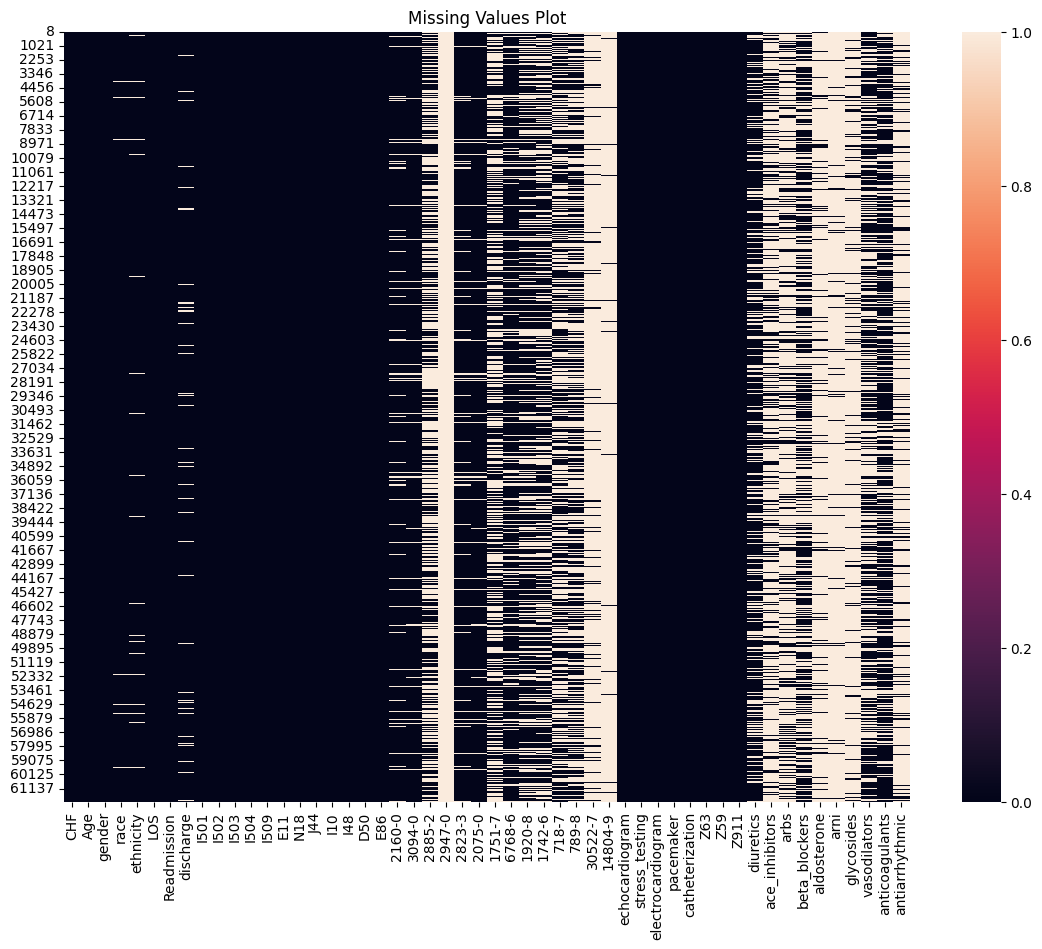

In [11]:
plot_missing_vals(df_data)

In [12]:
# printing null percentages|
null_percentages = df_data.isnull().sum() / len(df_data) * 100
print(null_percentages)

CHF                   0.000000
Age                   0.000000
gender                0.000000
race                  1.659097
ethnicity             2.695094
LOS                   0.000000
Readmission           0.000000
discharge             4.902218
I501                  0.000000
I502                  0.000000
I503                  0.000000
I504                  0.000000
I509                  0.000000
E11                   0.000000
N18                   0.000000
J44                   0.000000
I10                   0.000000
I48                   0.000000
D50                   0.000000
E86                   0.000000
2160-0                7.071807
3094-0                4.631958
2885-2               50.388499
2947-0               99.958710
2823-3                6.606359
2075-0                4.305394
1751-7               50.696295
6768-6               17.165272
1920-8               32.603881
1742-6               38.872415
718-7                47.456927
789-8                45.842874
30522-7 

In [13]:
# column_with_high_null_per = null_percentages[null_percentages>100].index.tolist()
# print("dropping:", column_with_high_null_per)

In [14]:
# dropping columns with more than 44% of nul values
# df_data.drop(columns=column_with_high_null_per, inplace=True)

In [15]:
print(df_data.columns)
print(df_data.shape)

Index(['CHF', 'Age', 'gender', 'race', 'ethnicity', 'LOS', 'Readmission',
       'discharge', 'I501', 'I502', 'I503', 'I504', 'I509', 'E11', 'N18',
       'J44', 'I10', 'I48', 'D50', 'E86', '2160-0', '3094-0', '2885-2',
       '2947-0', '2823-3', '2075-0', '1751-7', '6768-6', '1920-8', '1742-6',
       '718-7', '789-8', '30522-7', '14804-9', 'echocardiogram',
       'stress_testing', 'electrocardiogram', 'pacemaker', 'catheterization',
       'Z63', 'Z59', 'Z911', 'diuretics', 'ace_inhibitors', 'arbs',
       'beta_blockers', 'aldosterone', 'arni', 'glycosides', 'vasodilators',
       'anticoagulants', 'antiarrhythmic'],
      dtype='object')
(26641, 52)


Converting medicine usage to binary feature

In [16]:
# convert medicine columns to binary
columns_medicine = ['diuretics', 'ace_inhibitors', 'arbs','beta_blockers', 'aldosterone', 'arni', 'glycosides', 'vasodilators','anticoagulants', 'antiarrhythmic']
for col in columns_medicine:
    df_data[col] = df_data[col].apply(lambda x: 1 if pd.notna(x) and x != "" else 0)

<ipython-input-16-04773c9a32c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[col] = df_data[col].apply(lambda x: 1 if pd.notna(x) and x != "" else 0)


In [17]:
plot_frequency_graph(df_data, "discharge")

Value Frequencies for discharge
discharge
1.0     10719
2.0       284
3.0      6506
4.0        83
5.0         9
6.0      5295
7.0       485
9.0         6
20.0        3
21.0        1
30.0       22
50.0      434
51.0      125
61.0        7
62.0      464
63.0      575
64.0       21
65.0       27
66.0        2
70.0       24
81.0        1
82.0        4
83.0        3
86.0        4
90.0        4
91.0        4
92.0        1
95.0        2
98.0       31
99.0      189
Name: count, dtype: int64


In [18]:
# replacing null discharge values with the mode
mode_value = df_data["discharge"].mode()[0]
df_data["discharge"].fillna(mode_value, inplace=True)

<ipython-input-18-39e1bb8b3087>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data["discharge"].fillna(mode_value, inplace=True)
<ipython-input-18-39e1bb8b3087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["discharge"].fillna(mode_value, inplace=True)


In [19]:
def map_values(df, col: str, mappings: dict) -> None:
    '''replace all keys found in df[col] with their values as defined in mappings'''
    if col in df.columns:
        df[col] = df[col].replace(mappings)
    else:
        print("Column not in df")    

In [20]:
mappings_for_ethnicity = {"Non-Hispan": "2186-5", 
                          "Hispanic": "2135-2", 
                          "Unknown": None, 
                          "Not Hispan": "2186-5",
                          "Hispanic o": "2135-2",
                          "U": None,
                          "2) NO": None }
map_values(df_data, "ethnicity", mappings_for_ethnicity)

<ipython-input-19-b058c71b30fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(mappings)


In [21]:
plot_frequency_graph(df_data, "ethnicity")

Value Frequencies for ethnicity
ethnicity
2135-2     3141
2186-5    21812
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


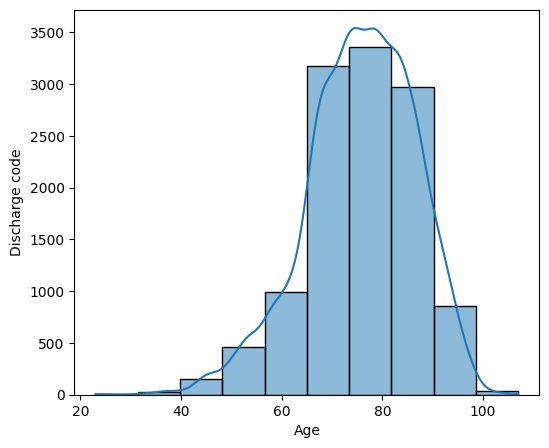

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


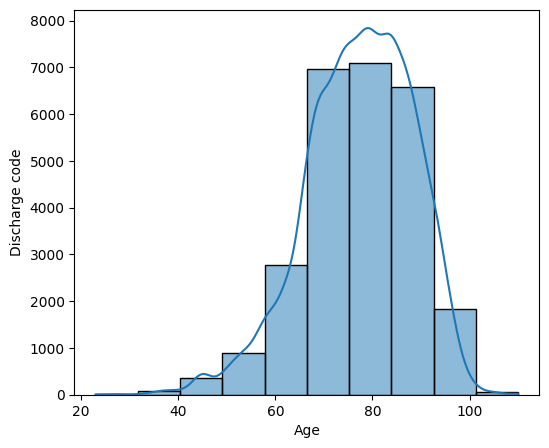

In [22]:
code = 1
df_discharge_code_1 = df_data[df_data['discharge'] == code]
plt.figure(figsize=(6,5))
sns.histplot(df_discharge_code_1['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Discharge code')
plt.show()
plt.figure(figsize=(6,5))
sns.histplot(df_data['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Discharge code')
plt.show()

In [23]:
# removing patients deceased, with unknown discharge codes, or with planned readmission
discharge_codes_to_drop = [98,99,81,82]
df_data = df_data[~df_data['discharge'].isin(discharge_codes_to_drop)]

Creating new Column to represent discharge to home

In [24]:
# mappings for discharge to home facility without medical care facility (home,home-hospice,court,psych ward)
discharged_to_home_codes = [1,7,21,50,65]
df_data['discharge'] = df_data['discharge'].apply(lambda x: 0 if x in discharged_to_home_codes else 1)

In [25]:
save_df_as_excel(df_data, "chf-pr-binary-discharge")